In [1]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import mglearn

In [69]:
dataframe= pd.read_csv('diabetes.csv')
dataframe.describe()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [54]:
train_data=dataframe[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
train_data2=dataframe[['Pregnancies','Glucose','BloodPressure','Insulin','DiabetesPedigreeFunction','Age']]
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [55]:
X_train, X_test , y_train,y_test =train_test_split(train_data2, dataframe['Outcome'], random_state=0)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.head()

(576, 6)
(192, 6)
(576,)
(192,)


,Pregnancies,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Age
762,9,89,62,0,0.142,33
127,1,118,58,94,0.261,23
564,0,91,80,0,0.601,27
375,12,140,82,325,0.528,58
663,9,145,80,130,0.637,40


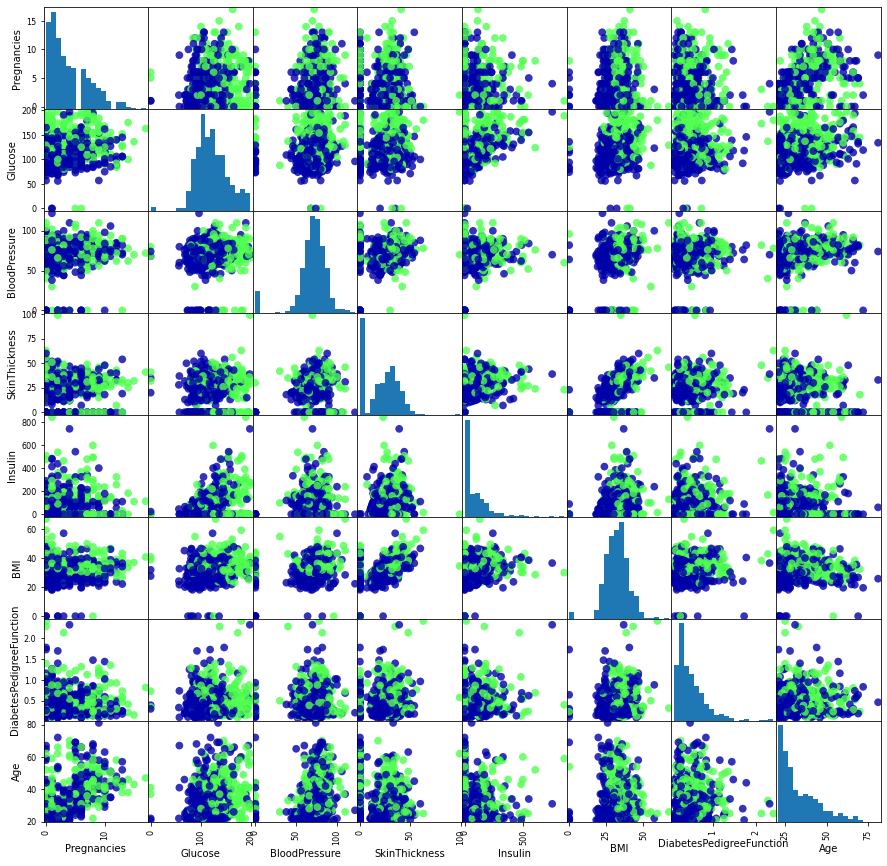

In [35]:
grr= pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(15,15),
                               marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [67]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [68]:
prediction= knn.predict(X_test)
print("Accuracy of Algorithm is :{}".format(np.mean(prediction==y_test)))

Accuracy of Algorithm is :0.765625


In [53]:
print(prediction)

[1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


In [47]:
y_test.head(20)

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
31     1
546    1
278    0
593    0
737    0
202    0
175    1
55     0
479    0
365    0
Name: Outcome, dtype: int64